In [ ]:
import pyupbit
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import datetime
import backtrader as bt

In [ ]:
tick = pyupbit.get_tickers(fiat="KRW")
len(tick)

113

In [ ]:
tickers = pyupbit.get_tickers(fiat="KRW")
tickers
y = pyupbit.get_ohlcv("KRW-BTC", count=1655, to = "20220401")
y['coin'] = "KRW-BTC"
y = y.reset_index(drop=False, inplace=False)
y.rename(columns={'index':'date'}, inplace=True)
#y = y.iloc[0:0]
#y = y[['date','coin','open','high','low','close','volume','value']]
y

,date,open,high,low,close,volume,value,coin
0,2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,KRW-BTC
1,2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,KRW-BTC
2,2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,KRW-BTC
3,2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,KRW-BTC
4,2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,KRW-BTC
...,...,...,...,...,...,...,...,...
1644,2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11,KRW-BTC
1645,2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11,KRW-BTC
1646,2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11,KRW-BTC
1647,2022-03-30 09:00:00,56985000.0,57100000.0,56015000.0,56620000.0,4136.114493,2.345294e+11,KRW-BTC


In [ ]:
import backtrader as bt
class BuyAndHold_Buy(bt.Strategy):
    def start(self):
        # set the starting cash
        self.val_start = self.broker.get_cash() 
    def nextstart(self):
        # Buy stocks with all the available cash
        size = self.val_start / self.data
        self.buy(size=size)
    def stop(self):
        # calculate the actual returns
        self.roi = (self.broker.get_value() / self.val_start) - 1.0
        print("ROI: %.2f, Cash: %.2f" % (100.0 * self.roi, self.broker.get_value()))

In [ ]:
y = y.reset_index(drop=False, inplace=False)

In [ ]:
y.date = pd.to_datetime(y.date)
data = bt.feeds.PandasData(dataname=y, datetime='date')
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(BuyAndHold_Buy, "HODL")
cerebro.broker.setcash(1000000.0)
#cerebro.broker.setcommission(commission=0.0005) #수수료 0.05%
#cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
print(f'Starting Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW') #시작 시 자산
cerebro.run()
print(f'Final Portfollio Value   : {cerebro.broker.getvalue():,.0f} KRW') #종료 시 자산

Starting Portfolio Value : 1,000,000 KRW
ROI: 1180.82, Cash: 12808190.65
Final Portfollio Value   : 12,808,191 KRW


<IPython.core.display.Javascript object>


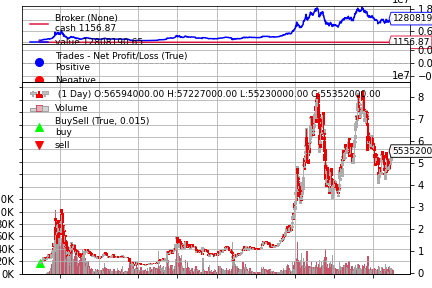

In [ ]:
plt = cerebro.plot()
#plt = cerebro.plot(style='candlestick')

<IPython.core.display.Javascript object>


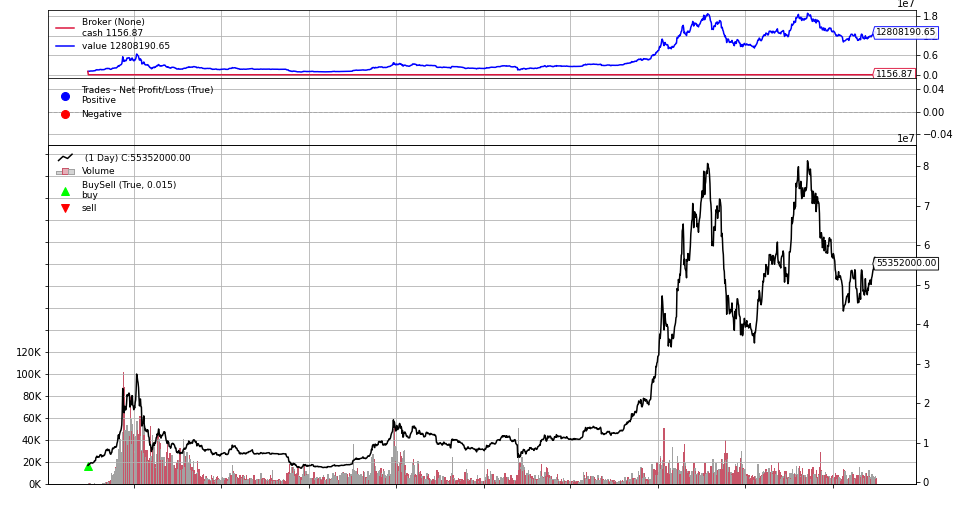

In [ ]:
plt = cerebro.plot(style='line')

In [ ]:
# 6. 평가지표 추가
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)

# 7. 백테스트 시작
results = cerebro.run()

# 8. 평가 결과 report
analyzers = results[0].analyzers
mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
cagr = analyzers.returns.get_analysis()['rnorm100']
sharp = analyzers.sharperatio.get_analysis()['sharperatio']
print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")

ROI: 1180.82, Cash: 12808190.65
mdd : 86.80, cagr: 47.65, sharp: 0.81


In [ ]:
plt.savefig("Graph.png")

AttributeError: 'list' object has no attribute 'savefig'

In [ ]:
class MyStrategy(bt.Strategy):
    def __init__(self):
        self. = bt.indi

In [ ]:
for i in tickers:
    x = pyupbit.get_ohlcv(i, count=1655)
    x['coin']= i
    #x = x.iloc[0:1]
    x = x.reset_index(drop=False, inplace=False)
    x.rename(columns={'index':'date'}, inplace=True)
    y = pd.concat([x, y])

In [ ]:
y.to_csv('y.csv', index=False, encoding='cp949')

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117136 entries, 0 to 1648
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    117136 non-null  datetime64[ns]
 1   open    117136 non-null  float64       
 2   high    117136 non-null  float64       
 3   low     117136 non-null  float64       
 4   close   117136 non-null  float64       
 5   volume  117136 non-null  float64       
 6   value   117136 non-null  float64       
 7   coin    117136 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.0+ MB


In [ ]:
y = pd.read_csv('y.csv', index_col=0, header=0, encoding='cp949', sep=',')
y = pd.DataFrame(y)
y

,open,high,low,close,volume,value,coin
date,,,,,,,
2022-03-17 09:00:00,2835.0,4480.0,2835.0,3595.0,7.259981e+07,2.792669e+11,KRW-CELO
2022-03-18 09:00:00,3590.0,4180.0,3435.0,3765.0,6.704682e+07,2.542876e+11,KRW-CELO
2022-03-19 09:00:00,3760.0,3835.0,3645.0,3700.0,1.606202e+07,6.014955e+10,KRW-CELO
2022-03-20 09:00:00,3700.0,3700.0,3500.0,3515.0,4.928737e+06,1.766281e+10,KRW-CELO
2022-03-21 09:00:00,3515.0,3675.0,3405.0,3525.0,7.617881e+06,2.716175e+10,KRW-CELO
...,...,...,...,...,...,...,...
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5.341024e+03,2.920273e+11,KRW-BTC
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6.374435e+03,3.615686e+11,KRW-BTC
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6.629178e+03,3.789075e+11,KRW-BTC


In [ ]:
yy = y[y.index == '2017-09-25 09:00:00']
yy = yy.sort_values(['value'], ascending=[False])
yy.info()
yy

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2017-09-25 09:00:00 to 2017-09-25 09:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    22 non-null     float64
 1   high    22 non-null     float64
 2   low     22 non-null     float64
 3   close   22 non-null     float64
 4   volume  22 non-null     float64
 5   value   22 non-null     float64
 6   coin    22 non-null     object 
dtypes: float64(6), object(1)
memory usage: 1.4+ KB


,open,high,low,close,volume,value,coin
date,,,,,,,
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,KRW-BTC
2017-09-25 09:00:00,324500.0,326500.0,320000.0,325000.0,1421.855427,4.590101e+08,KRW-ETH
2017-09-25 09:00:00,494000.0,500000.0,490000.0,493500.0,0.021200,1.050045e+04,KRW-BCH
2017-09-25 09:00:00,54700.0,58000.0,54200.0,57300.0,0.021100,1.201300e+03,KRW-LTC
2017-09-25 09:00:00,24750.0,29700.0,24500.0,28600.0,0.021100,5.733350e+02,KRW-NEO
2017-09-25 09:00:00,20450.0,20850.0,20000.0,20600.0,0.021300,4.369600e+02,KRW-REP
2017-09-25 09:00:00,11900.0,12200.0,11800.0,12100.0,0.021200,2.554850e+02,KRW-ETC
2017-09-25 09:00:00,10650.0,11350.0,10550.0,11050.0,0.021300,2.340250e+02,KRW-OMG
2017-09-25 09:00:00,9780.0,10800.0,9660.0,10500.0,0.021300,2.195040e+02,KRW-QTUM


In [ ]:
yy.to_csv('yy.csv', index=False, encoding='cp949')

In [ ]:
yy.info()

NameError: name 'yy' is not defined

In [ ]:
B = pyupbit.get_ohlcv("KRW-BTC", count=1643) #최초 데이터제공 시작 2017-09-25, 1643는 3.25기준 
#pd.isnull(k)
B_1 = B.reset_index(drop=False, inplace=False)
#B_1['date'] = B_1['date']
B_1.columns
B_1.rename(columns={'index':'date'}, inplace=True)
B_1.dropna(axis=0)
print(B_1)

                    date        open        high         low       close  \
0    2017-09-26 09:00:00   4317000.0   4418000.0   4311000.0   4321000.0   
1    2017-09-27 09:00:00   4322000.0   4677000.0   4318000.0   4657000.0   
2    2017-09-28 09:00:00   4657000.0   4772000.0   4519000.0   4586000.0   
3    2017-09-29 09:00:00   4586000.0   4709000.0   4476000.0   4657000.0   
4    2017-09-30 09:00:00   4657000.0   4896000.0   4651000.0   4895000.0   
...                  ...         ...         ...         ...         ...   
1638 2022-03-22 09:00:00  50128000.0  52396000.0  50013000.0  51704000.0   
1639 2022-03-23 09:00:00  51689000.0  52232000.0  51118000.0  52138000.0   
1640 2022-03-24 09:00:00  52138000.0  53416000.0  51800000.0  52966000.0   
1641 2022-03-25 09:00:00  52907000.0  54450000.0  52700000.0  53791000.0   
1642 2022-03-26 09:00:00  53836000.0  54099000.0  53402000.0  53908000.0   

           volume         value  
0       22.788340  9.950724e+07  
1       32.269662  

In [ ]:
B_1.to_csv('KRW-BTC.csv', index=False, encoding='cp949')

비트코인 종가데이터 저장

In [ ]:
BTC = pd.read_csv('KRW-BTC.csv', index_col=0, header=0, encoding='cp949', sep=',')
BTC = pd.DataFrame(BTC)
BTC = BTC.sort_values(['date'], ascending=[True])
BTC.index = pd.to_datetime(BTC.index)

csv 읽고 날짜순 정렬

In [ ]:
ema84 = BTC.close.ewm(span=84).mean()
ema182= BTC.close.ewm(span=182).mean()
macd = ema84 - ema182
signal = macd.ewm(span=63).mean()
macdhist = macd - signal

ndays_high = BTC.high.rolling(window=14, min_periods=1).max()
ndays_low = BTC.low.rolling(window=14, min_periods=1).min()
fast_k = (BTC.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window=3).mean()
#BTC = BTC.assign(fast_k=fast_k, slow_d=slow_d).dropna()

In [ ]:
#mpf.plot(BTC, type='candle', volume=True, mav=(5,20), style='starsandstripes')

In [ ]:
BTC['change'] = BTC['close'] - BTC['close'].shift(1)
BTC['rchange'] = (BTC['close'] - BTC['close'].shift(1)) / BTC['close'].shift(1) * 100
BTC['rise']=0
BTC['decline']=0
BTC['direction']= 0
BTC.loc[BTC['change'] >= 0, 'rise'] = BTC['change']
BTC.loc[BTC['change'] < 0, 'decline'] = -BTC['change']
BTC.loc[BTC['rchange'] >= 1, 'direction'] = 1
BTC['AU'] = BTC['rise'].ewm(span=14, adjust=False).mean()
BTC['DU'] = BTC['decline'].ewm(span=14, adjust=False).mean()
BTC['RSI'] = BTC['AU'] / (BTC['AU'] + BTC['DU']) *100
BTC['MA20'] = BTC['close'].rolling(window=20).mean()
BTC['MA5'] = BTC['close'].rolling(window=5).mean()
BTC['stddev'] = BTC['close'].rolling(window=20).std()
BTC['upper'] = BTC['MA20'] + (BTC['stddev'] *2)
BTC['lower'] = BTC['MA20'] - (BTC['stddev'] *2)
BTC['PB'] = (BTC['close'] - BTC['lower']) / (BTC['upper'] - BTC['lower']) *100 #볼린저밴드 지표
BTC['bandwidth'] = (BTC['upper'] - BTC['lower']) / (BTC['MA20']) *100 #밴드폭
BTC['TP'] = (BTC['high'] + BTC['low'] + BTC['close']) /3
BTC['PMF']=0
BTC['NMF']=0
for i in range(len(BTC.close)-1):
    if BTC.TP.values[i] < BTC.TP.values[i+1]:
        BTC.PMF.values[i+1] = BTC.TP.values[i+1] * BTC.volume.values[i+1]
        BTC.NMF.values[i+1]=0
    else:
        BTC.NMF.values[i+1] = BTC.TP.values[i+1] * BTC.volume.values[i+1]
        BTC.PMF.values[i+1]=0
BTC['MFR'] = BTC.PMF.rolling(window=10).sum() / BTC.NMF.rolling(window=10).sum()
BTC['MFI10'] = 100 - 100 / (1+BTC['MFR']) #현금흐름지표(MFI)추가
BTC['II'] = (2*BTC['close']-BTC['high']-BTC['low']) / (BTC['high']-BTC['low'])*BTC['volume']
BTC['IIP21'] =BTC['II'].rolling(window=21).sum() / BTC['volume'].rolling(window=21).sum()*100
BTC = BTC.assign(ema182=ema182, ema84=ema84, macd=macd, signal=signal, macdhist=macdhist)
BTC = BTC.assign(fast_k=fast_k, slow_d=slow_d)
BTC = BTC.dropna()



In [ ]:
BTC.columns

Index(['open', 'high', 'low', 'close', 'volume', 'value', 'change', 'rchange',
       'rise', 'decline', 'direction', 'AU', 'DU', 'RSI', 'MA20', 'MA5',
       'stddev', 'upper', 'lower', 'PB', 'bandwidth', 'TP', 'PMF', 'NMF',
       'MFR', 'MFI10', 'II', 'IIP21', 'ema182', 'ema84', 'macd', 'signal',
       'macdhist', 'fast_k', 'slow_d'],
      dtype='object')

In [ ]:
#BTCx = BTC[['open','high','low','close','volume','value','MA20','MA5','ema182','upper','lower','PB','MFI10','bandwidth','IIP21','macdhist','macd','signal','RSI','rchange']]
BTCx = BTC[['open','close','volume','fast_k','slow_d','MA20','MA5','ema182','upper','lower','PB','MFI10','bandwidth','IIP21','macdhist','RSI','rchange','direction']]
BTCx.to_csv('KRW-BTCx.csv', index=True, encoding='cp949')
BTCx

,open,close,volume,fast_k,slow_d,MA20,MA5,ema182,upper,lower,PB,MFI10,bandwidth,IIP21,macdhist,RSI,rchange,direction
date,,,,,,,,,,,,,,,,,,
2017-10-16 09:00:00,6403000.0,6491000.0,22.926635,78.541374,79.776643,5384200.0,6461200.0,5.376793e+06,6.764558e+06,4.003842e+06,90.091037,96.573004,51.274410,33.601869,3.390135e+04,79.834472,1.723868,100
2017-10-17 09:00:00,6495000.0,6457000.0,4.241337,76.951847,76.297335,5474200.0,6486200.0,5.431765e+06,6.889208e+06,4.059192e+06,84.727714,94.684230,51.697352,38.393009,3.594064e+04,77.582564,-0.523802,0
2017-10-18 09:00:00,6413000.0,6391000.0,36.001119,73.866293,76.453171,5564450.0,6476800.0,5.478705e+06,6.971156e+06,4.157744e+06,79.378922,66.705855,50.560462,37.398198,3.705695e+04,72.972247,-1.022147,0
2017-10-19 09:00:00,6405000.0,6511000.0,11.955656,78.740920,76.519686,5657150.0,6446200.0,5.527370e+06,7.056400e+06,4.257900e+06,80.510990,67.856704,49.468369,51.785419,3.860624e+04,75.968220,1.877640,100
2017-10-20 09:00:00,6536000.0,6928000.0,21.974264,98.712234,83.773149,5758800.0,6555600.0,5.591092e+06,7.218977e+06,4.298623e+06,90.036234,70.494609,50.711165,53.186749,4.248617e+04,83.362769,6.404546,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-22 09:00:00,50128000.0,51704000.0,8395.367481,86.717850,70.806455,49483000.0,50861800.0,5.448537e+07,5.239406e+07,4.657194e+07,88.147640,71.714361,11.765892,-4.693069,-1.154303e+06,62.599497,3.143951,100
2022-03-23 09:00:00,51689000.0,52138000.0,5293.402954,95.047985,79.764729,49497800.0,51135400.0,5.445972e+07,5.246188e+07,4.653372e+07,94.536537,78.452927,11.976626,1.064956,-1.086362e+06,64.949608,0.839393,0
2022-03-24 09:00:00,52138000.0,52966000.0,7289.941854,92.776886,91.514240,49723600.0,51479600.0,5.444339e+07,5.302091e+07,4.642629e+07,99.167300,78.942434,13.262569,5.552604,-1.010874e+06,69.208791,1.588093,100


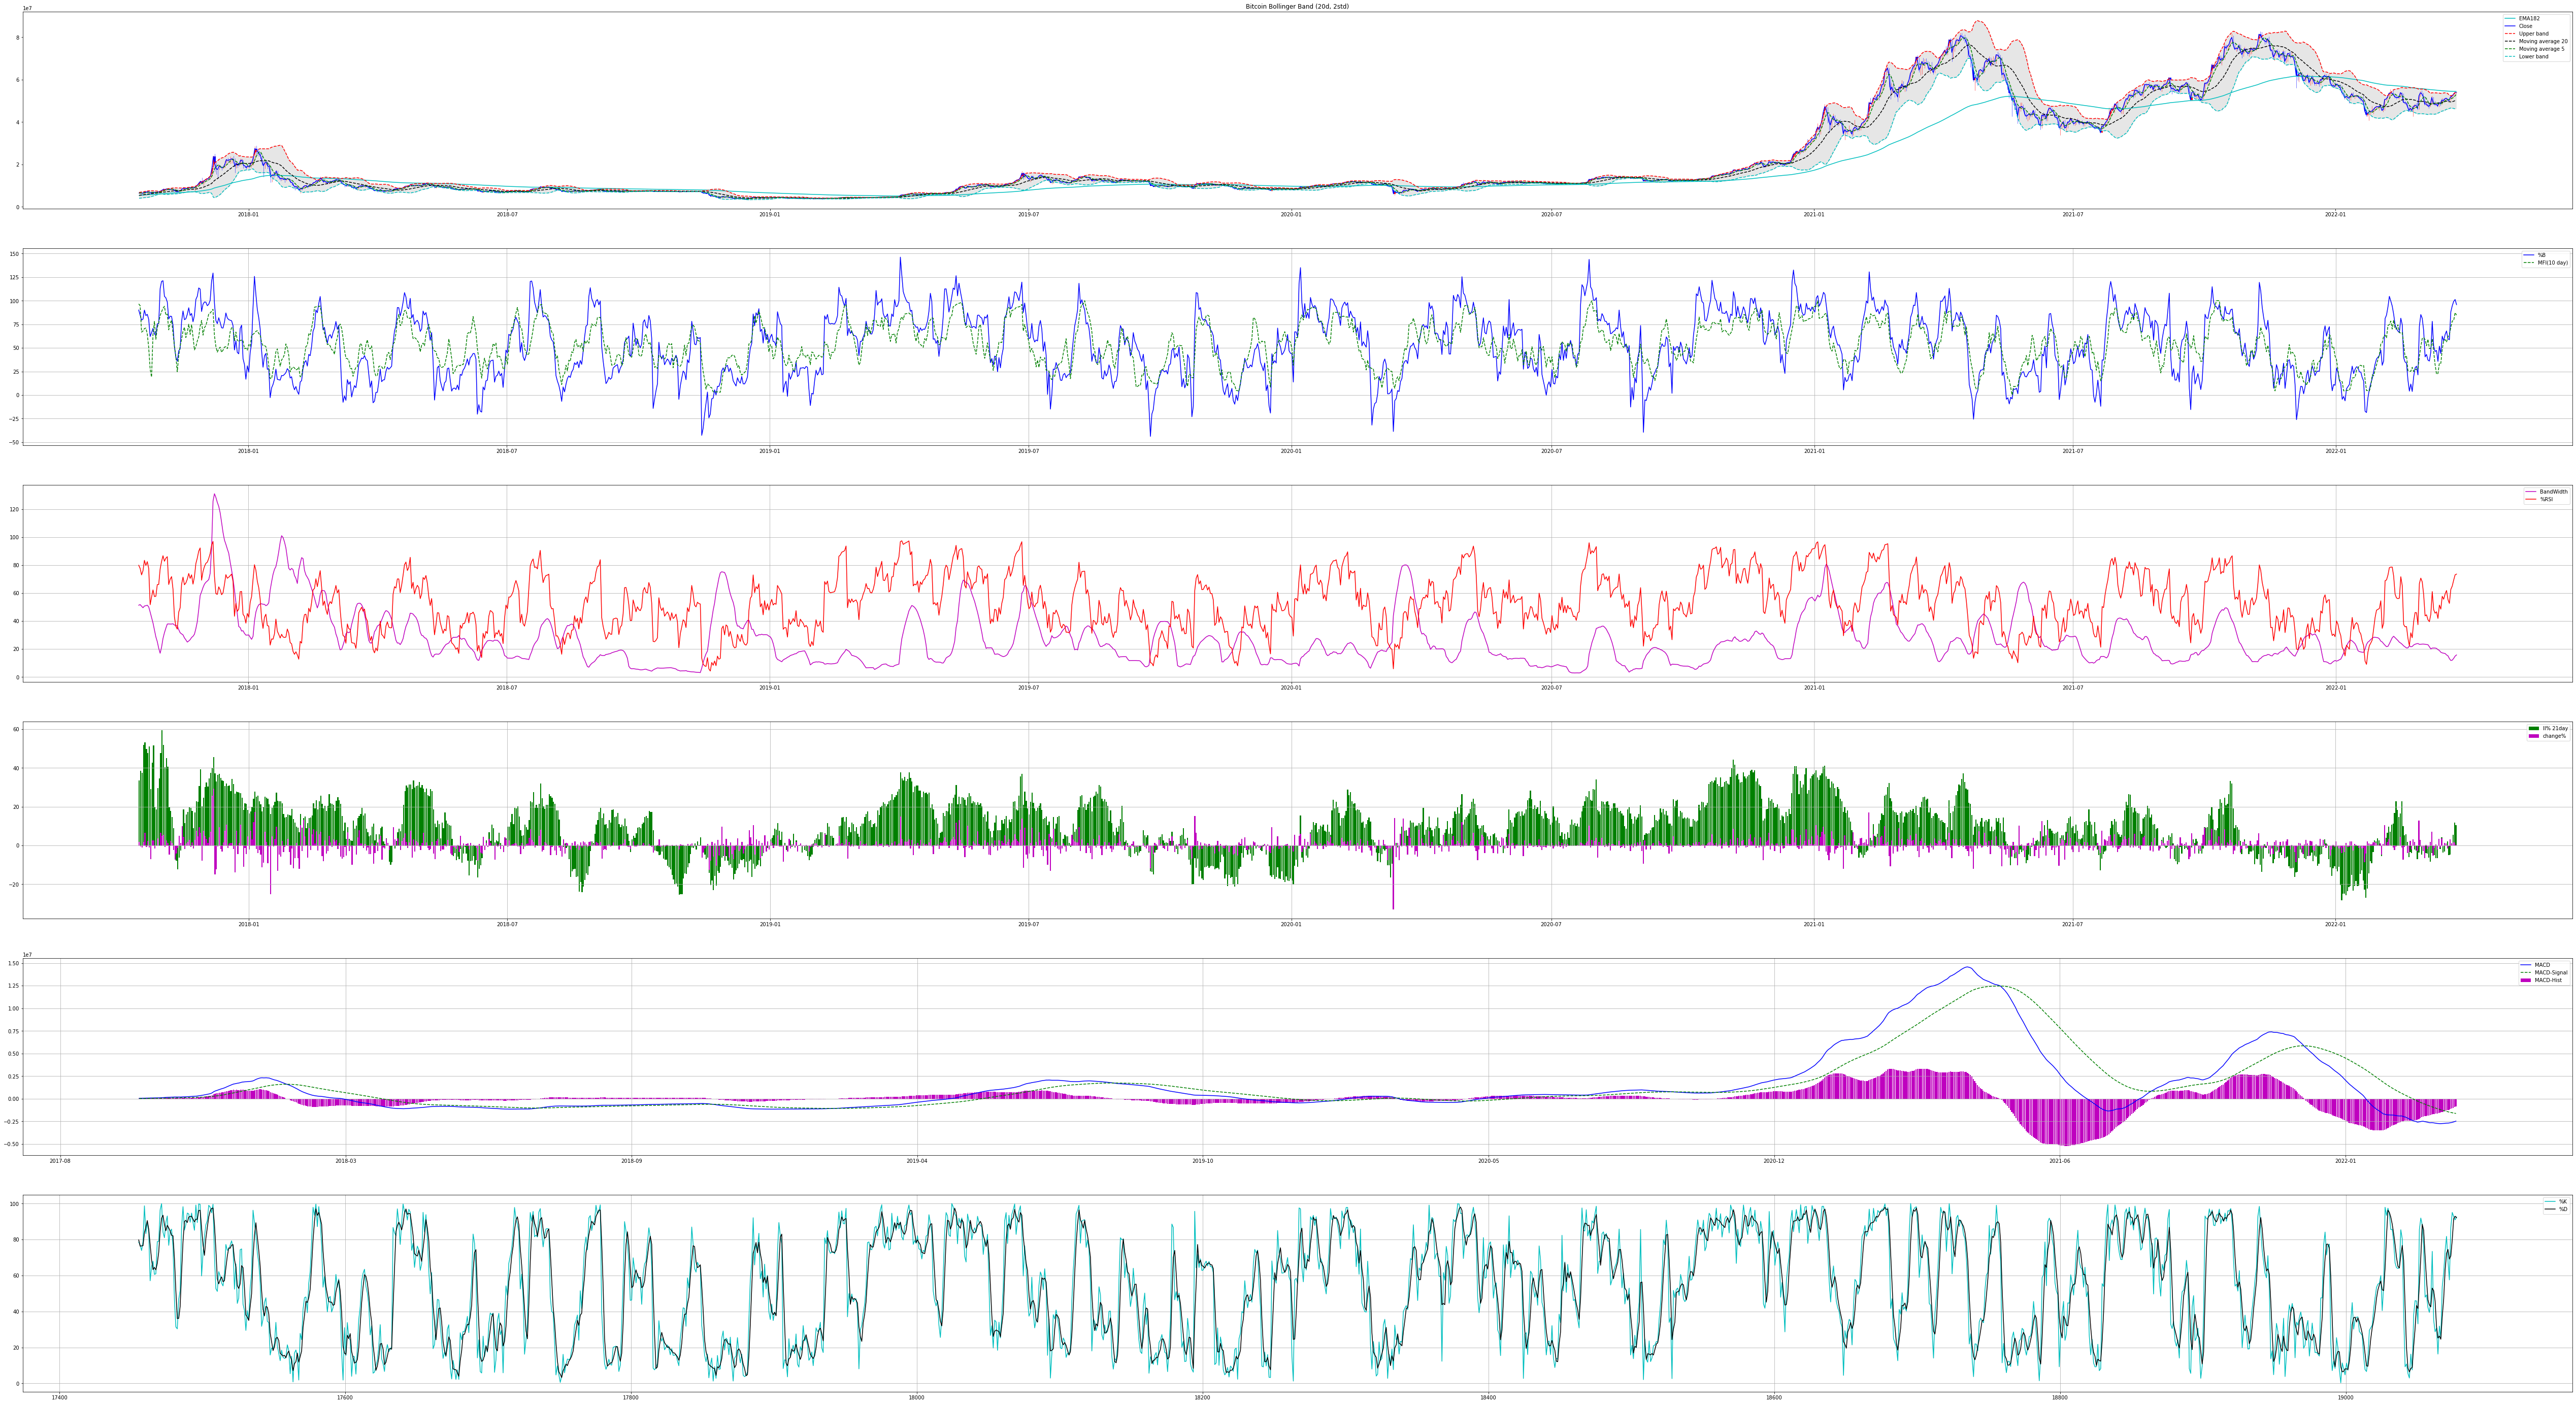

In [ ]:
plt.figure(figsize=(90,50))
BTC['number'] = BTC.index.map(mdates.date2num)
ohlc = BTC[['number', 'open', 'high', 'low', 'close']]
p1 = plt.subplot(6,1,1)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(BTC.number, BTC['ema182'], color='c', label='EMA182')
plt.plot(BTC.index, BTC['close'], color='blue', label='Close')
plt.plot(BTC.index, BTC['upper'], 'r--', label = 'Upper band')
plt.plot(BTC.index, BTC['MA20'], 'k--', label='Moving average 20')
plt.plot(BTC.index, BTC['MA5'], 'g--', label='Moving average 5')
plt.plot(BTC.index, BTC['lower'], 'c--', label = 'Lower band')
plt.fill_between(BTC.index, BTC['upper'], BTC['lower'], color='0.9')
plt.title('Bitcoin Bollinger Band (20d, 2std)')
plt.legend(loc='best')

plt.subplot(6,1,2)
plt.plot(BTC.index, BTC['PB'], color='b', label='%B')
plt.plot(BTC.index, BTC['MFI10'], 'g--', label='MFI(10 day)')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(6,1,3)
plt.plot(BTC.index, BTC['bandwidth'], color='m', label='BandWidth')
plt.plot(BTC.index, BTC['RSI'], color='r', label='%RSI')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(6,1,4)
plt.bar(BTC.index, BTC['IIP21'], color='g', label='II% 21day')
plt.bar(BTC.index, BTC['rchange'], color='m', label='change%')
plt.grid(True)
plt.legend(loc='best')

p2 = plt.subplot(6,1,5)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(BTC.number, BTC['macdhist'], color='m', label='MACD-Hist')
plt.plot(BTC.number, BTC['macd'], color='b', label='MACD')
plt.plot(BTC.number, BTC['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(6,1,6)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(BTC.number, BTC['fast_k'], color='c', label='%K')
plt.plot(BTC.number, BTC['slow_d'], color='k', label='%D')
plt.legend(loc='best')

plt.savefig("Graph.png")